KNNClassifier: a custom built class implementation for the k nearest neighbors logic.

src.shared imports: \
numpy as np \
pandas as pd \
matplotlib.pyplot as plt \
utils like load_dataset, calculating metrics, etc.

In [7]:
import sys
from pathlib import Path

project_root = str(Path.cwd().parents[1])

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.classification.knn import KNNClassifier
from src.shared import *

I chose a classic dataset suitable for classification. \
The Wines dataset fits this criterion well and is perfect for demonstrating the k-nearest-neighboars classifier.

Average stats per wine type:

         Alcohol  Malic acid       Ash  Alcalinity of ash   Magnesium  \
class                                                                   
1      13.744746    2.010678  2.455593          17.037288  106.338983   
2      12.278732    1.932676  2.244789          20.238028   94.549296   
3      13.153750    3.333750  2.437083          21.416667   99.312500   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
class                                                                     
1           2.840169    2.982373              0.290000         1.899322   
2           2.258873    2.080845              0.363662         1.630282   
3           1.678750    0.781458              0.447500         1.153542   

       Color intensity       Hue  OD280/OD315 of diluted wines     Proline   
class                                                                        
1             5.528305  1.062034                      3.157797  1115.711

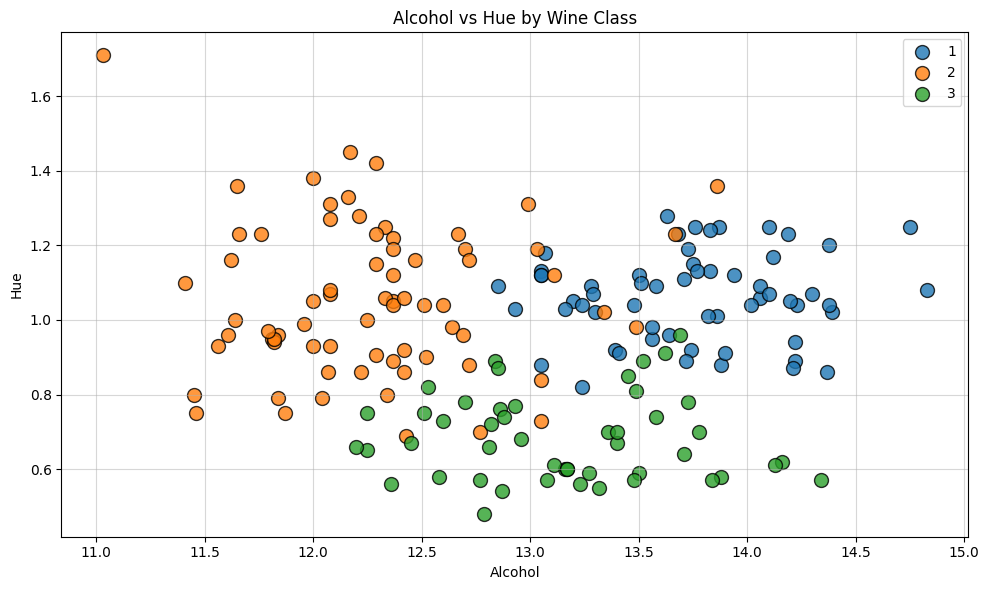

In [8]:
# --- 1. Load Data ---
df = load_dataset('wines')


# --- 2. Data Cleaning ---
# no need to clean as the dataset is already clean


# --- 3. Analysis ---
wines_stats = df.groupby('class').mean()

print("Average stats per wine type:\n")
print(wines_stats)


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

for i, (name, group) in enumerate(df.groupby('class')):
    plt.scatter(
        x=group['Alcohol'],
        y=group['Hue'],
        label=name,
        edgecolors='black',
        alpha=0.8,
        s=100
    )

plt.title("Alcohol vs Hue by Wine Class")
plt.xlabel("Alcohol")
plt.ylabel("Hue")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Training on 143 samples
Testing on 35 samples

--- Testing Results ---
Accuracy: 91.43%

Predictions vs Actual:
[2 2 1 2 3 2 1 2 1 3 3 2 1 3 2 1 3 1 3 3 3 1 1 2 1 2 2 2 3 3 1 3 2 1 2] (Predictions)
[2 2 1 2 3 2 1 2 1 3 3 2 1 3 2 1 3 1 3 2 2 1 1 2 1 2 2 2 2 3 1 3 2 1 2] (Actual)


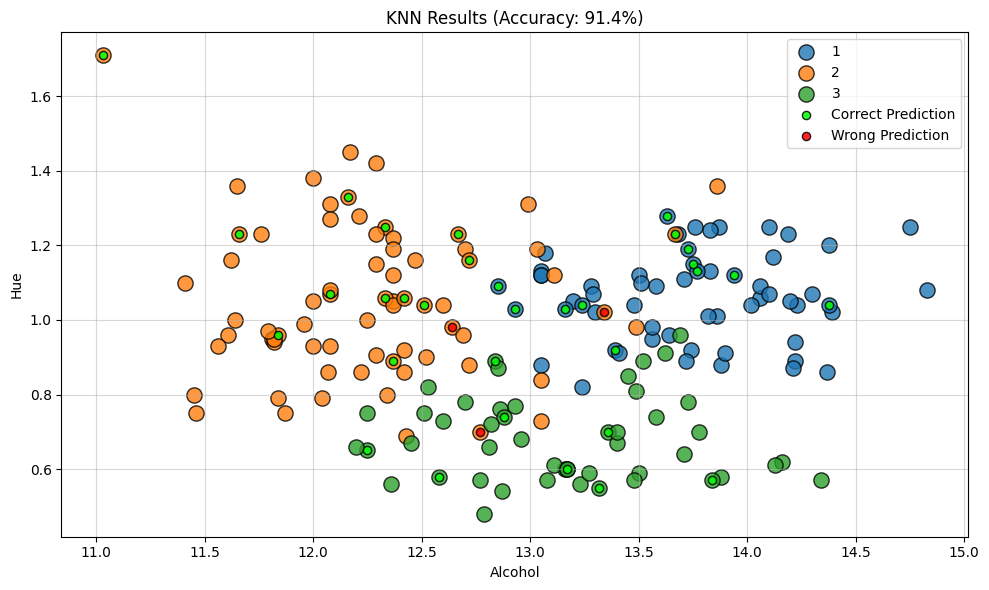

In [9]:
# --- 1. Select Features & Target ---
X = df.drop('class', axis=1).values
y = df['class'].values # classes are already labeled as 1, 2, 3


# --- 2. Split Data for training & testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


# Normalizing features to 0-1 range is a MUST to allow the model to treat all features appropriately no matter the scale.
train_min = X_train.min(axis=0)
train_range = X_train.max(axis=0) - train_min + 1e-15

X_train = (X_train - train_min) / train_range
X_test = (X_test - train_min) / train_range


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = KNNClassifier()
model.fit(X_train, y_train) # so called 'training' (storing the data)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

predictions = model.predict(X_test, k=5)

print("\n--- Testing Results ---") 
accuracy = Metrics.accuracy(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


# --- 5. Visualization ---
print("\nPredictions vs Actual:")
print(predictions, "(Predictions)")
print(y_test, "(Actual)")

plt.figure(figsize=(10, 6))

for i, (name, group) in enumerate(df.groupby('class')):
    plt.scatter(
        x=group['Alcohol'],
        y=group['Hue'],
        label=name,
        edgecolors='black',
        alpha=0.8,
        s=120
    )

features_list = df.drop('class', axis=1).columns.tolist()
alcohol_idx = features_list.index('Alcohol')
hue_idx = features_list.index('Hue')

X_test_orig = X_test * train_range + train_min

test_alcohol = X_test_orig[:, alcohol_idx]
test_hue = X_test_orig[:, hue_idx]

correct_mask = (predictions == y_test)
plt.scatter(
    x=test_alcohol[correct_mask],
    y=test_hue[correct_mask],
    label="Correct Prediction",
    color='lime',
    edgecolors='black',
    alpha=0.85,
    s=35,
    zorder=5 
)

wrong_mask = (predictions != y_test)
plt.scatter(
    x=test_alcohol[wrong_mask],
    y=test_hue[wrong_mask],
    label="Wrong Prediction",
    color='red',
    edgecolors='black',
    alpha=0.85,
    s=35,
    zorder=5
)

plt.title(f"KNN Results (Accuracy: {accuracy*100:.1f}%)")
plt.xlabel("Alcohol")
plt.ylabel("Hue")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# We are plotting Alcohol vs. Hue, but the model used all features to classify, not only these.
# So if you see a wrong prediction that's not an outlier, maybe its other features are outliers.